In [1]:
#imports qiskit and required components
from qiskit import QuantumCircuit            # For building quantum circuits
from qiskit_aer import Aer                   # Aer is Qiskit's simulator for running circuits
from qiskit.visualization import *           # For visualizing circuits and plotting results




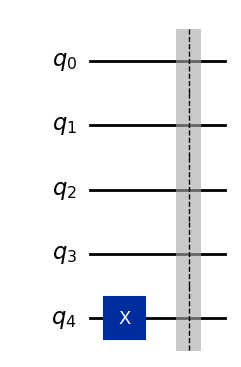

In [2]:
# Defines a constant oracle (for Deutsch-Josza Algorithm)
const_oracle = QuantumCircuit(5)             # Create a 5-qubit quantum circuit
const_oracle.x(4)                            # Apply X gate (NOT gate) to the last qubit, representing a constant function
const_oracle.barrier()                       # Barrier for visual separation
const_oracle.draw("mpl")                     # Draw the oracle circuit

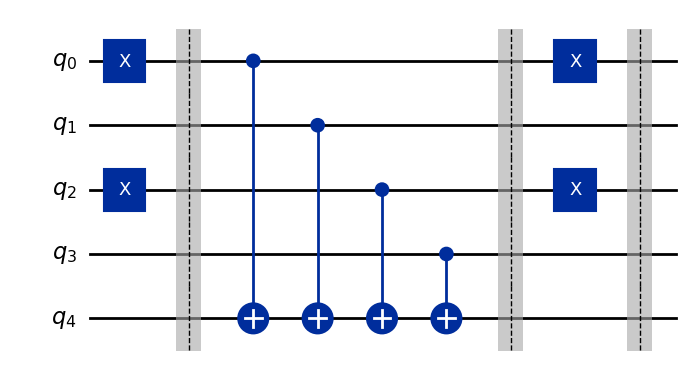

In [3]:
# Defines a balanced oracle (where half of the inputs give 0 and the other half give 1)
balanced_oracle = QuantumCircuit(5)          # Create a 5-qubit circuit (4 inputs + 1 output)
balanced_oracle.x(0)                         # Apply X gate to the first qubit (flip its state)
balanced_oracle.x(2)                         # Apply X gate to the third qubit
balanced_oracle.barrier()                    # Barrier for visual separation

# Applies controlled-X gates between the input qubits and the output qubit
for i in range(4):                           # Iterate over the first 4 qubits (input qubits)
    balanced_oracle.cx(i, 4)                 # Apply CNOT gate between input qubits and the last qubit (output qubit)
balanced_oracle.barrier()                    # Barrier for visual separation

# Restore the original states of qubits 0 and 2 (undoing the X gates applied earlier)
balanced_oracle.x(0)                         # Apply X gate to the first qubit again (flipping it back)
balanced_oracle.x(2)                         # Apply X gate to the third qubit again (flipping it back)
balanced_oracle.barrier()                    # Barrier for visual separation
balanced_oracle.draw("mpl")                  # Draw the balanced oracle circuit

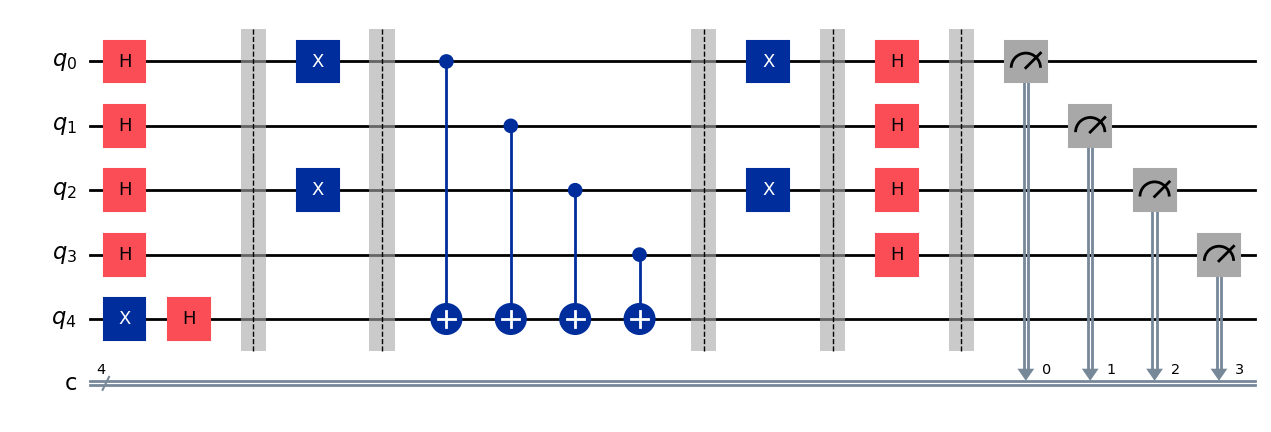

In [4]:
# Number of input qubits (n = 4) + 1 output qubit
n = 4                                        # Number of input qubits
dj_circuit = QuantumCircuit(n+1, n)          # Create a Deutsch-Josza circuit with (n+1) qubits and n classical bits

# Apply Hadamard gate to all input qubits (puts them in superposition)
for qubit in range(n):                       # Apply Hadamard gate to the first n qubits
    dj_circuit.h(qubit)                      # Hadamard puts the qubits in superposition

# Prepare the output qubit in the |1⟩ state
dj_circuit.x(n)                              # Apply X gate to the last qubit (output qubit)
dj_circuit.h(n)                              # Apply Hadamard gate to the output qubit
dj_circuit.barrier()                         # Barrier for visual separation

# Combine the DJ circuit with the balanced oracle
dj_circuit = dj_circuit.compose(balanced_oracle)  # Append the balanced oracle to the circuit

# Apply Hadamard gates again to all input qubits to perform the final step of DJ Algorithm
for qubit in range(n):                       # Apply Hadamard gate to each of the input qubits
    dj_circuit.h(qubit)
dj_circuit.barrier()                         # Barrier for visual separation

# Measure all the input qubits
for i in range(n):                           # Loop over the first n qubits
    dj_circuit.measure(i, i)                 # Measure each qubit and store the result in the corresponding classical bit

# Draw the final Deutsch-Josza circuit
dj_circuit.draw("mpl")                       # Draw the final circuit with measurement


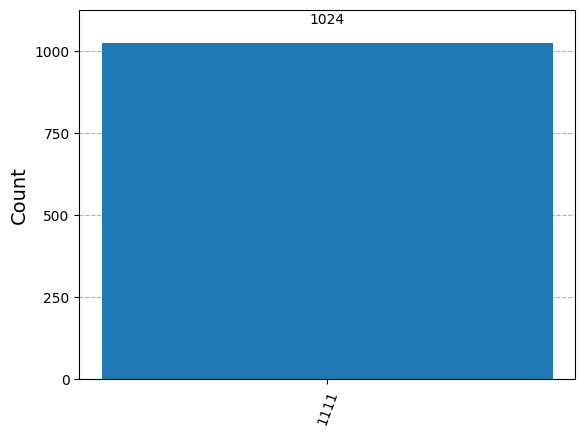

In [5]:
# Set up the quantum simulator and run the circuit
simulator = Aer.get_backend("qasm_simulator")  # Use the QASM simulator backend to simulate the quantum circuit
job = simulator.run(dj_circuit, shots=1024)   # Run the simulation with 1024 shots (repetitions)
counts = job.result().get_counts()            # Get the measurement results (counts of each result)

# Plot a histogram of the results
plot_histogram(counts)                        # Plot the results in a histogram